In [5]:
# Imports
import os

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2

README

# Drive on Mars

![Mars rover](https://panoptes-uploads.zooniverse.org/production/project_attached_image/17243d9d-1258-4aa7-80f0-6e7b20e957c6.png)

With this project we are attempting to improve the future of self driving vehicles on Mars.
Current autonomous vehicles driving algorithms are trained for streets and roads, very different from the conditions on Mars. 

Our model will predict which kind of terrains lies ahead of a rover: from soil, sand, bedrock or big rocks. This informs a rover navigation on the best route to take. We will build an image segmentation classifier, with a trained model available online.



# To work on this project:

## Clone this repo
`git clone  git@github.com:TigerManon/drive-on-mars.git`

## Download the data from Kaggle

[AI4MARS dataset](https://www.kaggle.com/datasets/yash92328/ai4mars-terrainaware-autonomous-driving-on-mars/data)


```
mv archive.zip <your-path-to-the-repo>/drive-on-mars/raw_data
cd <your-path-to-the-repo>/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip


pip install -r requirements
```

# For our team

Use the following commands

`path-to-the-repo =  ~/code/TigerManon`

```
mv archive.zip ~/code/TigerManon/drive-on-mars/raw_data
cd ~/code/TigerManon/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip

pip install -r requirements
```


## Defining paths

In [2]:
# Customize your path here
root_path = '../'

In [6]:
DATA_PATH = os.path.join(root_path, 'raw_data', 'ai4mars-dataset-merged-0.1', 'msl')
DATA_PATH

'../raw_data/ai4mars-dataset-merged-0.1/msl'

In [7]:
IMAGE_PATH = os.path.join(DATA_PATH, 'images', 'edr')
MASK_PATH_TRAIN = os.path.join(DATA_PATH, 'labels', 'train')
MASK_PATH_TESTS = os.path.join(DATA_PATH, 'labels', 'test')
TESTS_DIR = ['masked-gold-min1-100agree', 'masked-gold-min2-100agree', 'masked-gold-min3-100agree']

MASK_ROVER = os.path.join(DATA_PATH, 'images', 'mxy')
RANGE_30M = os.path.join(DATA_PATH, 'images', 'rng-30m')

In [8]:
def list_data_files():
    images = os.listdir(IMAGE_PATH)
    print(f"Found {len(images)} files in {IMAGE_PATH}")

    rover_masks = os.listdir(MASK_ROVER)
    print(f"Found {len(rover_masks)} files in {MASK_ROVER}")

    range_masks = os.listdir(RANGE_30M)
    print(f"Found {len(range_masks)} files in {RANGE_30M}")

    train_masks = os.listdir(MASK_PATH_TRAIN)
    print(f"Found {len(train_masks)} files in {MASK_PATH_TRAIN}")

    print('-'*20)
    for test_dir in TESTS_DIR:
        test_dir_path = os.path.join(MASK_PATH_TESTS,test_dir)
        print(f"Found {len(os.listdir(test_dir_path))} files in {test_dir_path}")

list_data_files()

Found 36260 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr
Found 36194 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy
Found 36192 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m
Found 32128 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/train
--------------------
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min3-100agree


In [9]:
color_channels = 1

### Opening an image

In [9]:
images = sorted(os.listdir(IMAGE_PATH))

In [10]:
# Testing with first image
test = 3
imname = 'NLA_401855249EDR_F0042778NCAM00434M1'
imname

'NLA_401855249EDR_F0042778NCAM00434M1'

In [11]:
image_file = os.path.join(IMAGE_PATH,images[test])
image_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLA_397586934EDR_F0010008AUT_04096M1.JPG:Zone.Identifier'

In [12]:
img_raw = cv2.imread(image_file)
img = np.zeros((1024,1024))
img[:,:] = img_raw[:,:,0]
img

TypeError: 'NoneType' object is not subscriptable

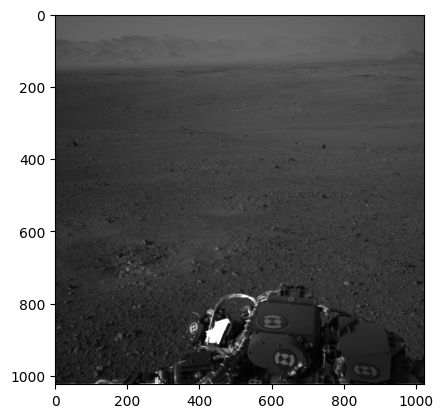

In [11]:
plt.imshow(img,cmap='gray')

### Opening rover and range masks

In [14]:
mask_file = os.path.join(MASK_ROVER, imname.replace("EDR","MXY") + ".png")
mask_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy/NLA_401855249MXY_F0042778NCAM00434M1.png'

In [15]:
mask_raw = np.array(cv2.imread(mask_file))
mask_raw
mask = np.zeros((1024,1024))
mask[:,:] = mask_raw[:,:,0]
mask = 1-mask

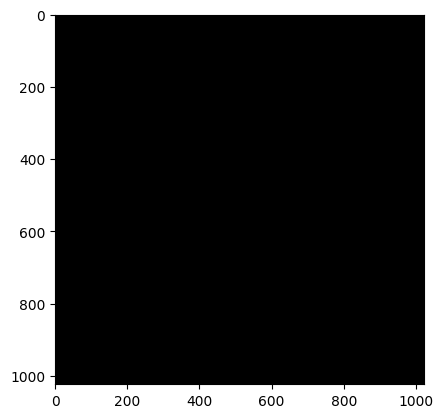

In [16]:
plt.imshow(mask,cmap='gray')
plt.title;

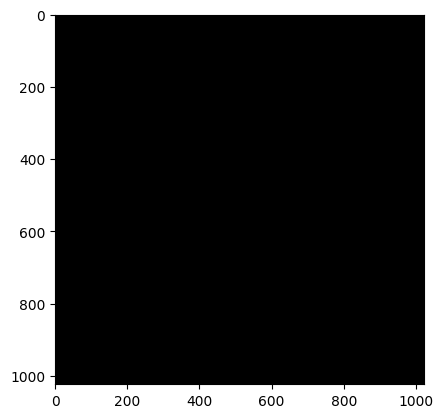

In [17]:
img_mask = img * mask
plt.imshow(img_mask,cmap='gray') ;

In [18]:
range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
range_mask_file


'../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m/NLA_401855249RNG_F0042778NCAM00434M1.png'

In [19]:
range_30m_raw = np.array(cv2.imread(range_mask_file))

range_30m = np.zeros((1024,1024))
range_30m[:,:] = range_30m_raw[:,:,0]
range_30m = 1 - range_30m
range_30m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

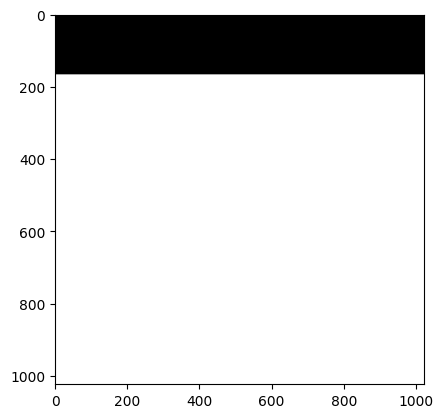

In [20]:
plt.imshow(range_30m,cmap='gray') ;

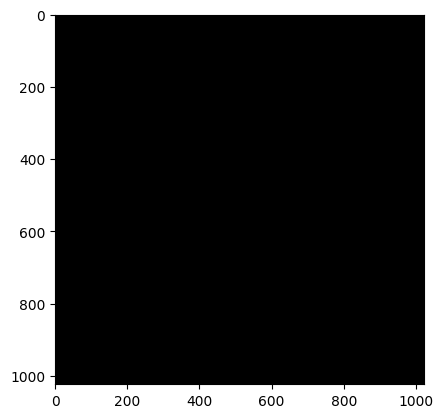

In [21]:
img_mask = img * mask * range_30m
plt.imshow(img_mask,cmap='gray') ;

## Load data methods

In [22]:
def create_df(path):
    """
    Loading images with corresponding masks and labels
    """
    names = []
    labels = []

    for filename in sorted(os.listdir(path)):
        imname = filename.split('.')[0]

        label = imname
        imname = imname.replace("_merged","")

        # checking raw image
        raw_image_file = os.path.join(IMAGE_PATH,imname + ".JPG")
        if not os.path.isfile(raw_image_file):
            print('No raw image found for', imname)
            continue

        # checking rover masks
        mask_rover_file = os.path.join(MASK_ROVER,imname.replace("EDR","MXY") + ".png")
        if not os.path.isfile(mask_rover_file):
            print('No rover mask found for', imname)
            continue

        # checking range masks
        range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
        if not os.path.isfile(range_mask_file):
            print('No range mask found for', imname)
            continue

        names.append(imname)
        labels.append(label)

    df = pd.DataFrame(
        {'name': names, 'label': labels},
        index = np.arange(0, len(names)))
    df['rov_mask'] = df.name.apply(lambda imname: imname.replace("EDR","MXY"))
    df['rang_mask'] = df.name.apply(lambda imname: imname.replace("EDR","RNG"))

    return df

In [23]:
df_train = create_df(MASK_PATH_TRAIN)
df_train

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1
No range mask found for NLB_432655207EDR_F0160148NCAM00394M1


name  \
0      NLA_397586934EDR_F0010008AUT_04096M1   
1      NLA_397586934EDR_F0010008AUT_04096M1   
2      NLA_397681339EDR_F0020000AUT_04096M1   
3      NLA_397681339EDR_F0020000AUT_04096M1   
4      NLA_397681372EDR_F0020000AUT_04096M1   
...                                     ...   
32121  NRB_589344414EDR_F0722272NCAM00272M1   
32122  NRB_605858122EDR_F0750000NCAM00288M1   
32123  NRB_605858122EDR_F0750000NCAM00288M1   
32124  NRB_606479584EDR_F0750456NCAM00294M1   
32125  NRB_606479584EDR_F0750456NCAM00294M1   

                                      label  \
0      NLA_397586934EDR_F0010008AUT_04096M1   
1      NLA_397586934EDR_F0010008AUT_04096M1   
2      NLA_397681339EDR_F0020000AUT_04096M1   
3      NLA_397681339EDR_F0020000AUT_04096M1   
4      NLA_397681372EDR_F0020000AUT_04096M1   
...                                     ...   
32121  NRB_589344414EDR_F0722272NCAM00272M1   
32122  NRB_605858122EDR_F0750000NCAM00288M1   
32123  NRB_605858122EDR_F0750000NCAM00288M1   
32124  NRB_606479584EDR_F0750456NCAM00294M1   
32125  NRB_606479584EDR_F0750456NCAM00294M1   

                                   rov_mask  \
0      NLA_397586934MXY_F0010008AUT_04096M1   
1      NLA_397586934MXY_F0010008AUT_04096M1   
2      NLA_397681339MXY_F0020000AUT_04096M1   
3      NLA_397681339MXY_F0020000AUT_04096M1   
4      NLA_397681372MXY_F0020000AUT_04096M1   
...                                     ...   
32121  NRB_589344414MXY_F0722272NCAM00272M1   
32122  NRB_605858122MXY_F0750000NCAM00288M1   
32123  NRB_605858122MXY_F0750000NCAM00288M1   
32124  NRB_606479584MXY_F0750456NCAM00294M1   
32125  NRB_606479584MXY_F0750456NCAM00294M1   

                                  rang_mask  
0      NLA_397586934RNG_F0010008AUT_04096M1  
1      NLA_397586934RNG_F0010008AUT_04096M1  
2      NLA_397681339RNG_F0020000AUT_04096M1  
3      NLA_397681339RNG_F0020000AUT_04096M1  
4      NLA_397681372RNG_F0020000AUT_04096M1  
...                                     ...  
32121  NRB_589344414RNG_F0722272NCAM00272M1  
32122  NRB_605858122RNG_F0750000NCAM00288M1  
32123  NRB_605858122RNG_F0750000NCAM00288M1  
32124  NRB_606479584RNG_F0750456NCAM00294M1  
32125  NRB_606479584RNG_F0750456NCAM00294M1  

[32126 rows x 4 columns]

In [24]:
MASK_PATH_TEST3 = os.path.join(MASK_PATH_TESTS, TESTS_DIR[0])
df_test = create_df(MASK_PATH_TEST3)
df_test

name  \
0    NLA_409036068EDR_F0051606NCAM00348M1   
1    NLA_409036068EDR_F0051606NCAM00348M1   
2    NLA_409036116EDR_F0051606NCAM00348M1   
3    NLA_409036116EDR_F0051606NCAM00348M1   
4    NLA_409036860EDR_F0051662NCAM00346M1   
..                                    ...   
639  NLB_613583877EDR_F0760568NCAM00354M1   
640  NLB_613584057EDR_F0760568NCAM00281M1   
641  NLB_613584057EDR_F0760568NCAM00281M1   
642  NLB_613584326EDR_F0760568NCAM00281M1   
643  NLB_613584326EDR_F0760568NCAM00281M1   

                                           label  \
0    NLA_409036068EDR_F0051606NCAM00348M1_merged   
1    NLA_409036068EDR_F0051606NCAM00348M1_merged   
2    NLA_409036116EDR_F0051606NCAM00348M1_merged   
3    NLA_409036116EDR_F0051606NCAM00348M1_merged   
4    NLA_409036860EDR_F0051662NCAM00346M1_merged   
..                                           ...   
639  NLB_613583877EDR_F0760568NCAM00354M1_merged   
640  NLB_613584057EDR_F0760568NCAM00281M1_merged   
641  NLB_613584057EDR_F0760568NCAM00281M1_merged   
642  NLB_613584326EDR_F0760568NCAM00281M1_merged   
643  NLB_613584326EDR_F0760568NCAM00281M1_merged   

                                 rov_mask  \
0    NLA_409036068MXY_F0051606NCAM00348M1   
1    NLA_409036068MXY_F0051606NCAM00348M1   
2    NLA_409036116MXY_F0051606NCAM00348M1   
3    NLA_409036116MXY_F0051606NCAM00348M1   
4    NLA_409036860MXY_F0051662NCAM00346M1   
..                                    ...   
639  NLB_613583877MXY_F0760568NCAM00354M1   
640  NLB_613584057MXY_F0760568NCAM00281M1   
641  NLB_613584057MXY_F0760568NCAM00281M1   
642  NLB_613584326MXY_F0760568NCAM00281M1   
643  NLB_613584326MXY_F0760568NCAM00281M1   

                                rang_mask  
0    NLA_409036068RNG_F0051606NCAM00348M1  
1    NLA_409036068RNG_F0051606NCAM00348M1  
2    NLA_409036116RNG_F0051606NCAM00348M1  
3    NLA_409036116RNG_F0051606NCAM00348M1  
4    NLA_409036860RNG_F0051662NCAM00346M1  
..                                    ...  
639  NLB_613583877RNG_F0760568NCAM00354M1  
640  NLB_613584057RNG_F0760568NCAM00281M1  
641  NLB_613584057RNG_F0760568NCAM00281M1  
642  NLB_613584326RNG_F0760568NCAM00281M1  
643  NLB_613584326RNG_F0760568NCAM00281M1  

[644 rows x 4 columns]

In [25]:
labels_key = {
    0: 'soil',
    1: 'bedrock',
    2: 'sand',
    3: 'big rock',
    4: '(no label)',
}

custom_colors = {
    0: 'blue',
    1: 'yellow',
    2: 'purple',
    3: 'red',
    4: 'white',
}

cmap_labels = ListedColormap([custom_colors[i] for i in range(max(custom_colors)+1)])

In [26]:
def load_image_set(im_id, df):

    # Load raw image
    edr_file = f'{df.name.iloc[im_id]}.JPG'
    image_raw = cv2.imread(os.path.join(IMAGE_PATH,edr_file))
    image = image_raw[:,:,0]

    # Load labels
    label_file = f'{df.label.iloc[im_id]}.png'
    label_raw = cv2.imread(os.path.join(MASK_PATH_TRAIN,label_file))
    label = label_raw[:,:,0]

    # Changing scale for the 'No label' encoded as 255
    label[label == 255] = 4

    # Load and combine both masks
    rov_mask_file = f'{df.rov_mask.iloc[im_id]}.png'
    rov_mask_raw = np.array(cv2.imread(os.path.join(MASK_ROVER,rov_mask_file)))
    rov_mask = np.zeros((1024,1024))
    rov_mask[:,:] = rov_mask_raw[:,:,0]

    rang_mask_file = f'{df.rang_mask.iloc[im_id]}.png'
    rang_mask_raw = np.array(cv2.imread(os.path.join(RANGE_30M,rang_mask_file)))
    rang_mask = np.zeros((1024,1024))
    rang_mask[:,:] = rang_mask_raw[:,:,0]

    # reversing mask to only keep the image out of the mask
    mask = (1-rov_mask) * (1-rang_mask)

    return image, label, mask

In [27]:
def decompose_label(label_img):

    label_0 = np.where(label_img == 0, 1, 0)
    label_1 = np.where(label_img == 1, 1, 0)
    label_2 = np.where(label_img == 2, 1, 0)
    label_3 = np.where(label_img == 3, 1, 0)
    label_4 = np.where(label_img == 4, 1, 0)

    return np.array([label_0, label_1, label_2, label_3, label_4])


In [28]:
def load_images(df):
    """
    Aggregates images and labels with masks applied
    Input: Dataframe of train or test sets
    Output: Array of
        masked images from raws
        masked labels
    """
    X, y = [], []
    for i in df.index:
        [image, label, mask] = load_image_set(i, df)

        X.append(image * mask)
        y.append(label * mask)

    X = np.array(X)
    y = np.array(y)
    print('✅ loaded raw images and labels')
    y_decomp = decompose_label(y)
    print('✅ decomposed labels into binary masks')

    return X, y_decomp

X,y = load_images(df_train.iloc[:200])

✅ loaded raw images and labels


: 

In [27]:
X.shape

(200, 1024, 1024)

In [25]:
def show_image(image, mask=None):

    n_sub = 1
    if mask is not None:
        n_sub=2
    fig, ax = plt.subplots(1, n_sub, figsize=(16,9))

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Raw image')

    if n_sub==2:
        ax[1].axis('off')
        ax[1].imshow(image*mask, cmap='gray')
        ax[1].set_title('Masked')


351
365
456


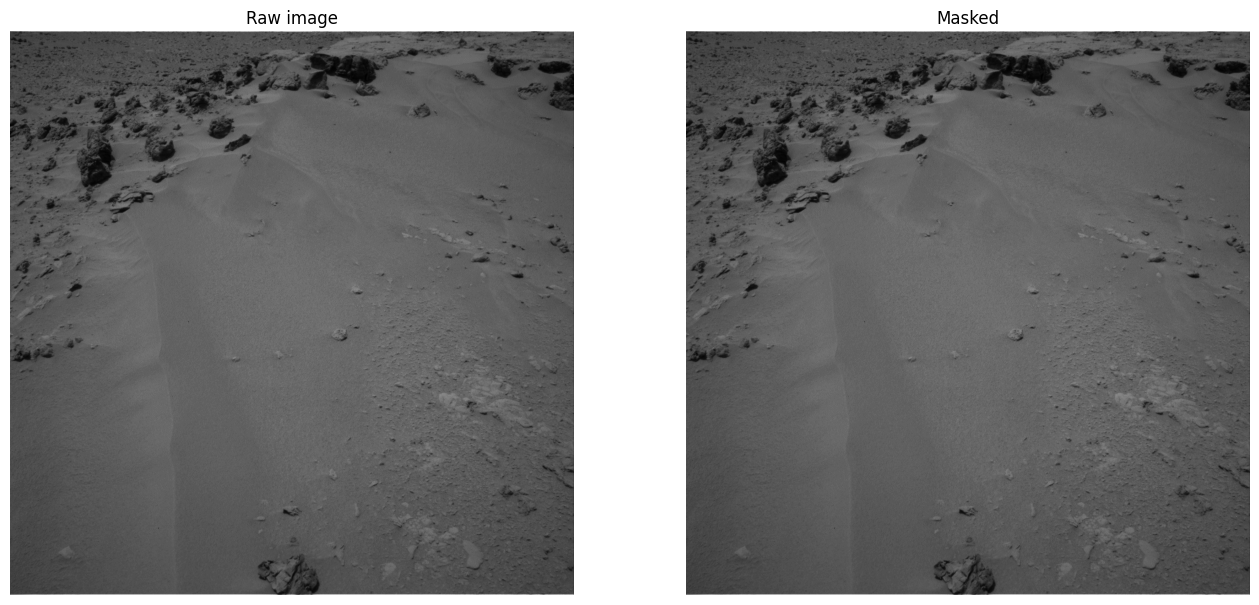

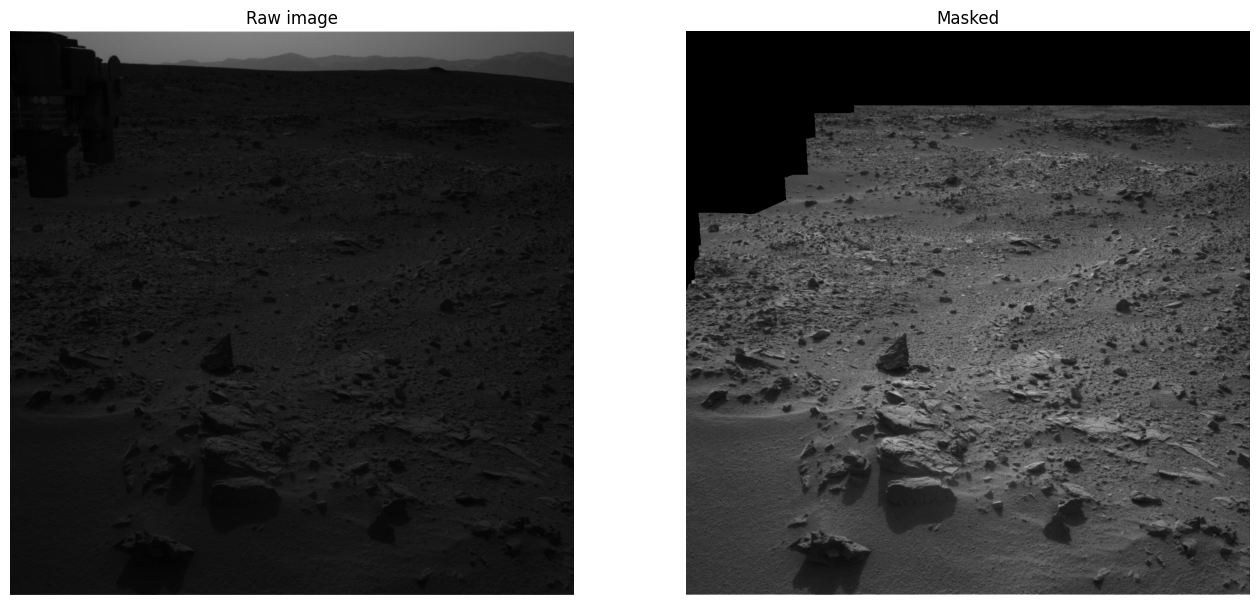

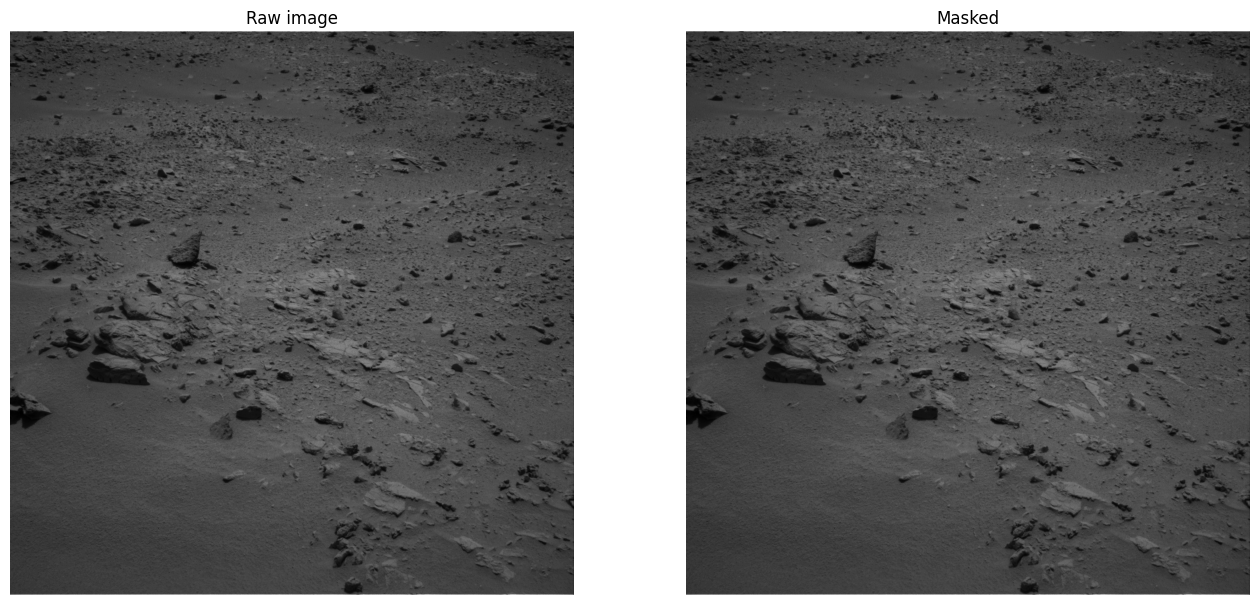

In [29]:
# Showing examples of images where there is a variety of terrains
for i in range(500):
    image, label, mask = load_image_set(i, df_train)
    if len(np.unique(label))>4:
        print(i)
        show_image(image, mask)


In [1]:
# Picking just one example to work on for the rest of the notebook
ex_id = 10920

image, label, mask = load_image_set(ex_id, df_train)

NameError: name 'load_image_set' is not defined

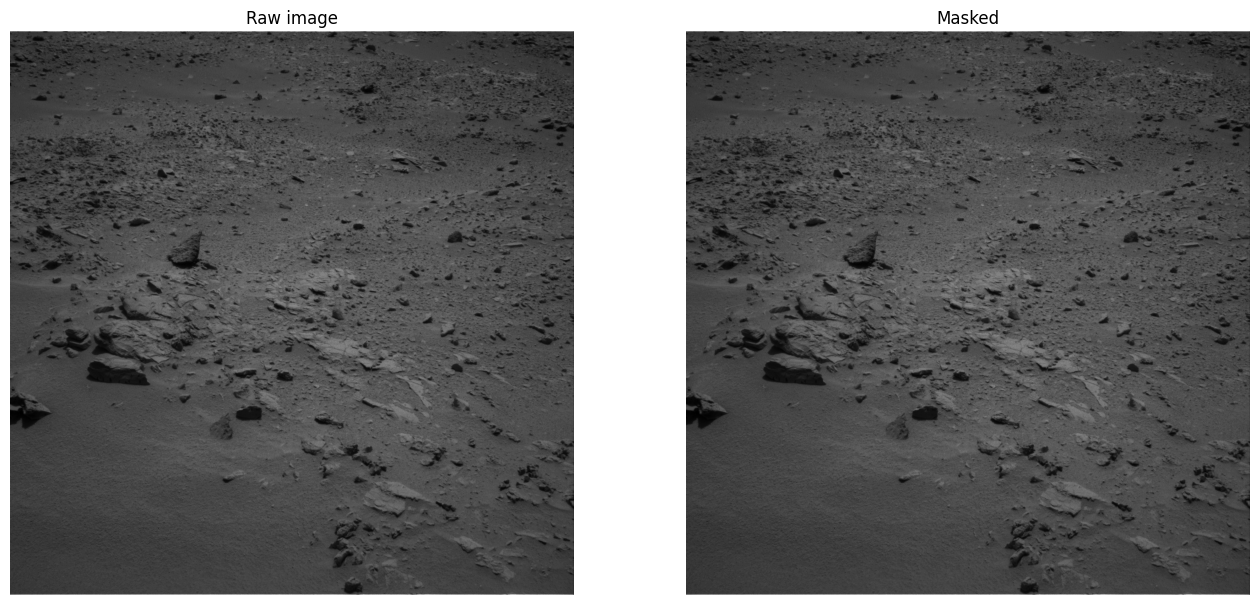

In [ ]:
show_image(image, mask)

In [32]:
decomp = decompose_label(label)
decomp.shape

(5, 1024, 1024)

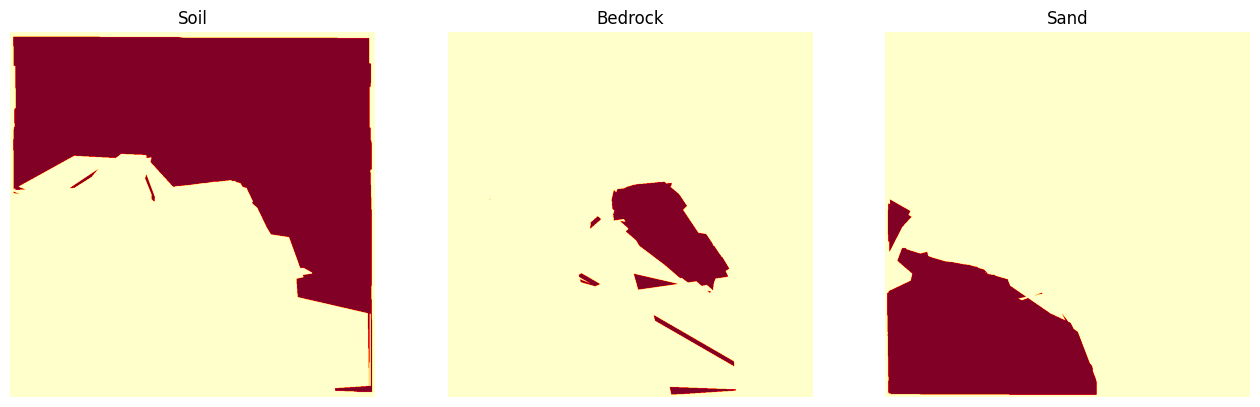

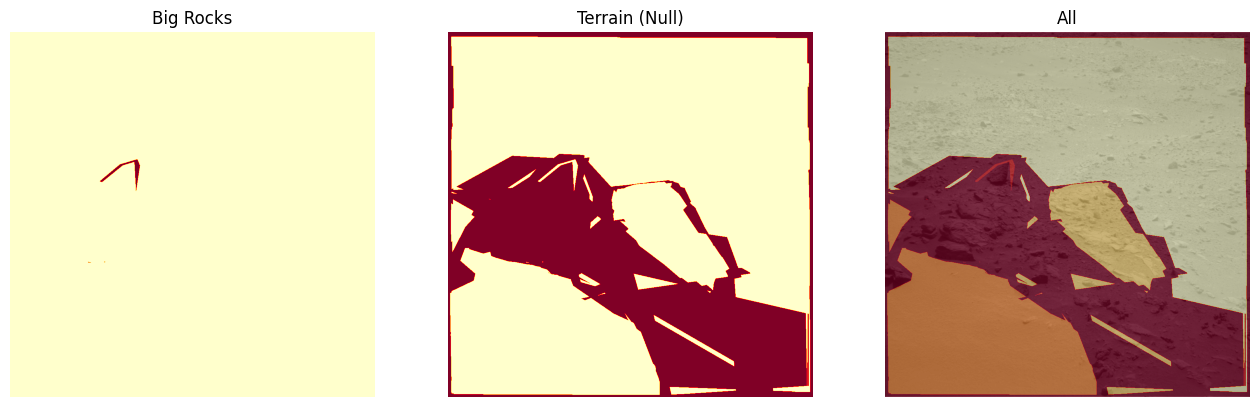

In [33]:
def show_labels_indv(label,image):

    label_0, label_1, label_2, label_3, label_4 = decompose_label(label)

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_0, cmap='YlOrRd')
    ax[0].set_title('Soil')
    ax[1].axis('off')
    ax[1].imshow(label_1, cmap='YlOrRd')
    ax[1].set_title('Bedrock')
    ax[2].axis('off')
    ax[2].imshow(label_2, cmap='YlOrRd')
    ax[2].set_title('Sand')

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_3, cmap='YlOrRd')
    ax[0].set_title('Big Rocks')
    ax[1].axis('off')
    ax[1].imshow(label_4,cmap='YlOrRd')
    ax[1].set_title('Terrain (Null)')

    ax[2].axis('off')
    ax[2].imshow(image,cmap='gray')
    ax[2].imshow(label, alpha =0.6, cmap='YlOrRd')

    ax[2].set_title('All')

show_labels_indv(label,image)

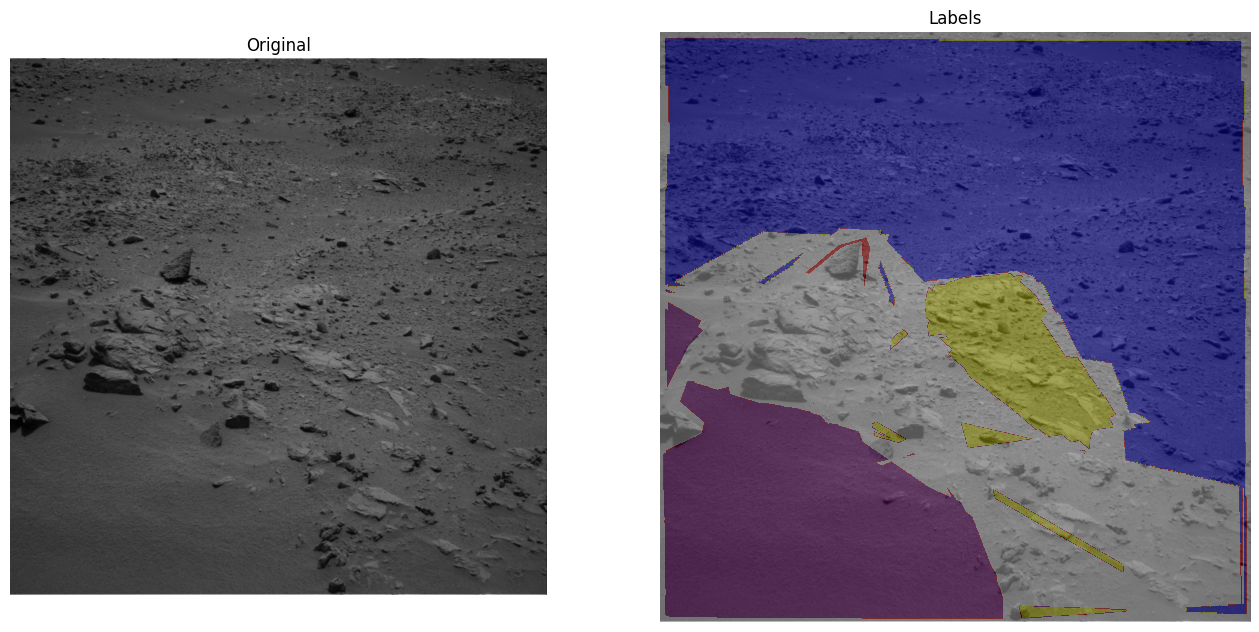

In [34]:
def show_labels_comp(image,label):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [2, 2.2]})

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    ax[0].set_title('Original')

    ax[1].axis('off')
    ax[1].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    img = ax[1].imshow(label, alpha=0.3, cmap=cmap_labels, aspect='equal')  # Set aspect='equal' for square
    ax[1].set_title('Labels')

#     divider = make_axes_locatable(ax[1])
#     cbar_ax = divider.append_axes("right", size="5%", pad=0.2)  # Adjust the size and pad

#     # Add colorbar to the right subplot
#     cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.unique(label), orientation='vertical')

#     # Add tick labels to the colorbar
#     tick_labels = labels_key.values()
#     cbar.set_ticks(np.unique(label))
#     cbar.set_ticklabels(tick_labels)
#     cbar.ax.tick_params(axis='y', length=0)
#     cbar.ax.set_yticklabels(tick_labels, va='center')


    plt.show()
show_labels_comp(image,label)

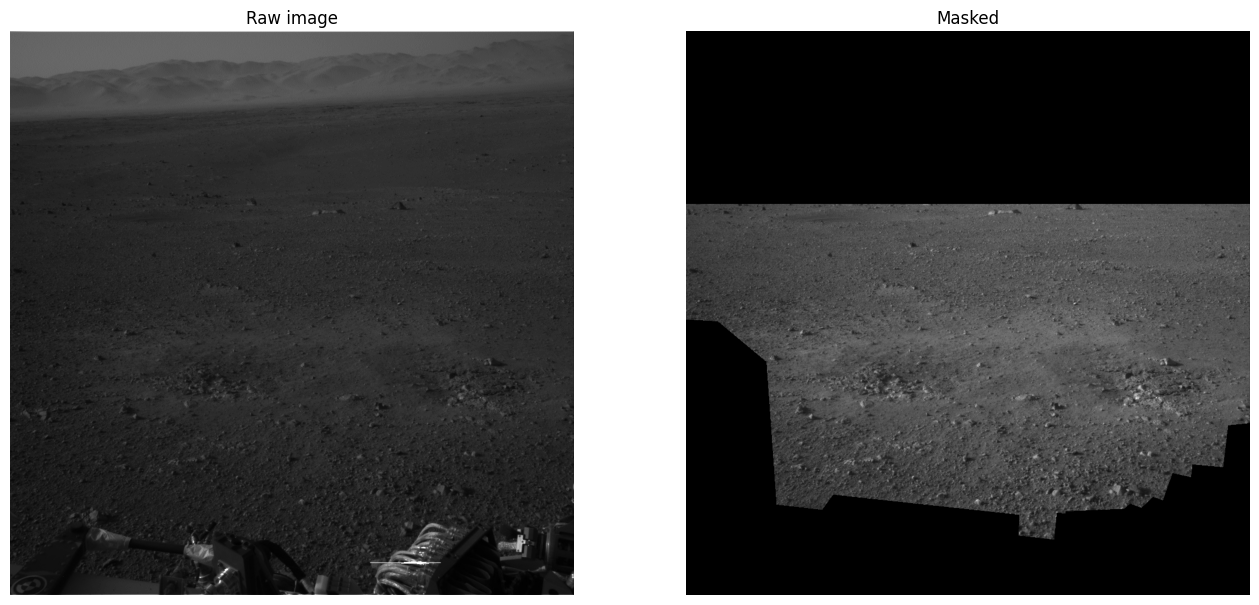

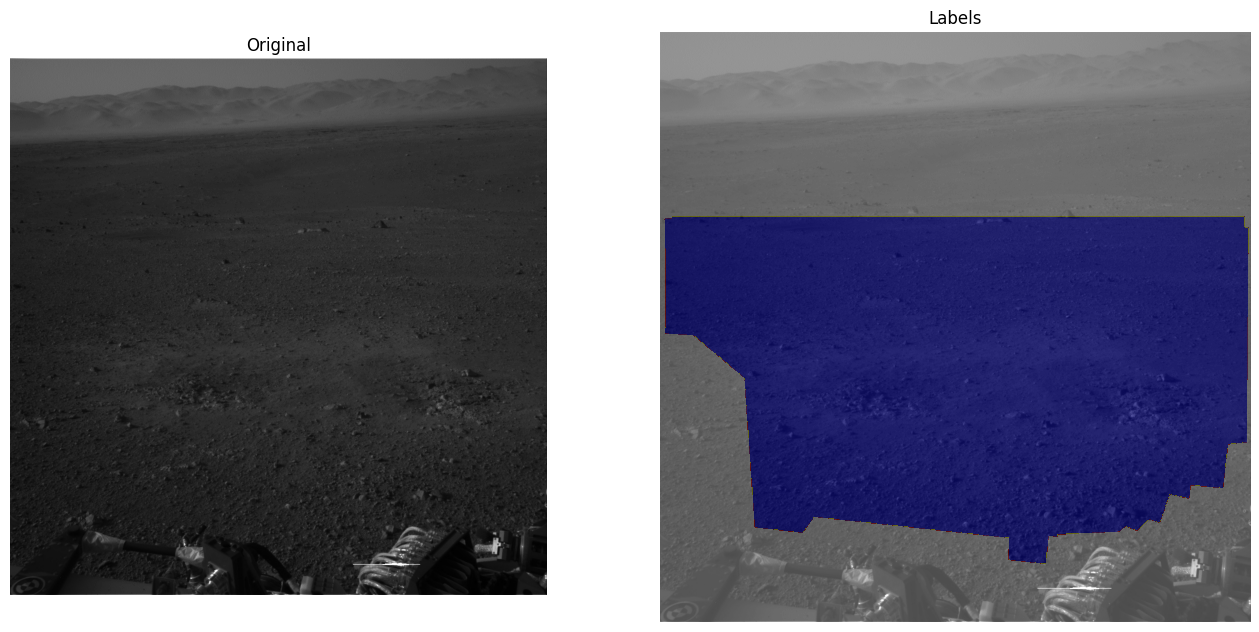

In [35]:
# Another example

image, label, mask = load_image_set(1, df_train)
show_image(image, mask)

show_labels_comp(image,label)

## Checking the images in the test set

In [36]:
TESTS_DIR

['masked-gold-min1-100agree',
 'masked-gold-min2-100agree',
 'masked-gold-min3-100agree']

In [37]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[0])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
322


name  \
0  NLA_409036068EDR_F0051606NCAM00348M1   
1  NLA_409036116EDR_F0051606NCAM00348M1   
2  NLA_409036860EDR_F0051662NCAM00346M1   
3  NLA_409036993EDR_F0051662NCAM05703M1   
4  NLA_409037112EDR_F0051662NCAM05703M1   

                                         label  \
0  NLA_409036068EDR_F0051606NCAM00348M1_merged   
1  NLA_409036116EDR_F0051606NCAM00348M1_merged   
2  NLA_409036860EDR_F0051662NCAM00346M1_merged   
3  NLA_409036993EDR_F0051662NCAM05703M1_merged   
4  NLA_409037112EDR_F0051662NCAM05703M1_merged   

                               rov_mask                             rang_mask  
0  NLA_409036068MXY_F0051606NCAM00348M1  NLA_409036068RNG_F0051606NCAM00348M1  
1  NLA_409036116MXY_F0051606NCAM00348M1  NLA_409036116RNG_F0051606NCAM00348M1  
2  NLA_409036860MXY_F0051662NCAM00346M1  NLA_409036860RNG_F0051662NCAM00346M1  
3  NLA_409036993MXY_F0051662NCAM05703M1  NLA_409036993RNG_F0051662NCAM05703M1  
4  NLA_409037112MXY_F0051662NCAM05703M1  NLA_409037112RNG_F0051662NCAM05703M1

In [38]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[1])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
322


name  \
0  NLA_409036068EDR_F0051606NCAM00348M1   
1  NLA_409036116EDR_F0051606NCAM00348M1   
2  NLA_409036860EDR_F0051662NCAM00346M1   
3  NLA_409036993EDR_F0051662NCAM05703M1   
4  NLA_409037112EDR_F0051662NCAM05703M1   

                                         label  \
0  NLA_409036068EDR_F0051606NCAM00348M1_merged   
1  NLA_409036116EDR_F0051606NCAM00348M1_merged   
2  NLA_409036860EDR_F0051662NCAM00346M1_merged   
3  NLA_409036993EDR_F0051662NCAM05703M1_merged   
4  NLA_409037112EDR_F0051662NCAM05703M1_merged   

                               rov_mask                             rang_mask  
0  NLA_409036068MXY_F0051606NCAM00348M1  NLA_409036068RNG_F0051606NCAM00348M1  
1  NLA_409036116MXY_F0051606NCAM00348M1  NLA_409036116RNG_F0051606NCAM00348M1  
2  NLA_409036860MXY_F0051662NCAM00346M1  NLA_409036860RNG_F0051662NCAM00346M1  
3  NLA_409036993MXY_F0051662NCAM05703M1  NLA_409036993RNG_F0051662NCAM05703M1  
4  NLA_409037112MXY_F0051662NCAM05703M1  NLA_409037112RNG_F0051662NCAM05703M1

# Data augmentation

In [39]:
# import albumentations as A

# Use scripts

In [40]:
small_dataset = 100

df = create_df(MASK_PATH_TRAIN)

df = df.iloc[:100]

X, y = load_images(df)

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1
✅ loaded raw images and labels
✅ decomposed labels into binary masks


In [41]:
X.shape, y.shape

((100, 1024, 1024), (5, 100, 1024, 1024))

In [13]:
from drive_on_mars.model.model import initialize_model, compile_model, train_model
from drive_on_mars.model.registry import save_model, save_results, load_model
from drive_on_mars.model.data import create_df, preproc_image, load_mask, preproc, load_preproc, decompose_label, load_images

import numpy as np

2023-12-13 08:32:19.151848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 08:32:19.775155: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-13 08:32:19.903416: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valerio/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:


Segmentation Models: using `keras` framework.


In [14]:
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import segmentation_models as sm
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
# from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from skimage import color

In [263]:
# Prediction : load le model

model = load_model()



Load latest model from local registry...

Load latest model from disk...
✅ Model compiled
✅ Model loaded from local disk


In [552]:
# Preprocess d'une seule image
img_test = '/home/valerio/code/TigerManon/drive-on-mars/raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_463551084EDR_F0411534NCAM00385M1.JPG'
X_pred_processed = preproc_image(img_test)

X_pred_processed = np.array([X_pred_processed])
X_pred_processed.shape

(1, 256, 256, 3)

Images:
good:
NLB_463551084EDR_F0411534NCAM00385M1
NLB_467991018EDR_F0440568NCAM00298M1
NLB_471806967EDR_F0442414NCAM00262M1
NLB_471625465EDR_F0442336NCAM00261M1
NLB_451296397EDR_F0311256NCAM00273M1
NLB_444990915EDR_F0260366NCAM00354M1

NLB_450138088EDR_F0310144NCAM00483M1

In [553]:
# Créer la prediction
y_pred = model.predict(X_pred_processed)
print(f"✅ pred() done")
y_pred.shape

1/1 [==============================] - 0s 259ms/step
✅ pred() done


(1, 256, 256, 5)

(1, 256, 256, 5)

0.97976166

In [554]:
# Trouver l'indice de la valeur maximale pour chaque ligne
max_indices = np.argmax(y_pred[:,:,:,:5], axis=3)
np.unique(max_indices)

array([0, 1, 2, 3, 4])

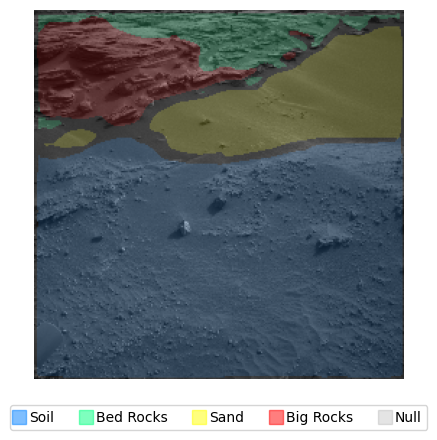

In [587]:
fig = plt.figure()
fig.patch.set_facecolor('none')


plt.imshow(
    color.label2rgb(
        max_indices[0],
        alpha=0.15,
        image=X_pred_processed[0],
        colors=[
            (0, 0.5, 1), # soil
            (0, 1, 0.5), # bed rocks
            (1, 1, 0), # sand
            (1, 0, 0), # big rocks
            (0, 0, 0)], # null
        bg_label=4,
        bg_color=(0,0,0, 0.9)
        )
    )

# Création de la légende
legend_labels = ['Soil', 'Bed Rocks', 'Sand', 'Big Rocks', 'Null']
legend_colors = [(0, 0.5, 1, 0.5), (0.0, 1.0, 0.5, 0.5), (1, 1, 0, 0.5), (1.0, 0.0, 0.0, 0.5), (0.0, 0.0, 0.0, 0.1)]
# Création des patches (carrés colorés) pour la légende
patches = [plt.plot([], [], marker='s', markersize=10, linestyle='', color=color)[0] for color in legend_colors]

# Ajout de la légende au plot
plt.legend(patches, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(legend_labels), handlelength=0.5, handletextpad=0.5)

plt.axis('off')

plt.show()

In [ ]:
load_image_set()

In [307]:
X_pred_processed.shape

(1, 256, 256, 3)

In [310]:
layer_0 = y_pred[0][:,:,0]
layer_1= y_pred[0][:,:,1]
layer_2 = y_pred[0][:,:,2]
layer_3 = y_pred[0][:,:,3]
layer_4 = y_pred[0][:,:,4]

image = cv2.imread(img_test)

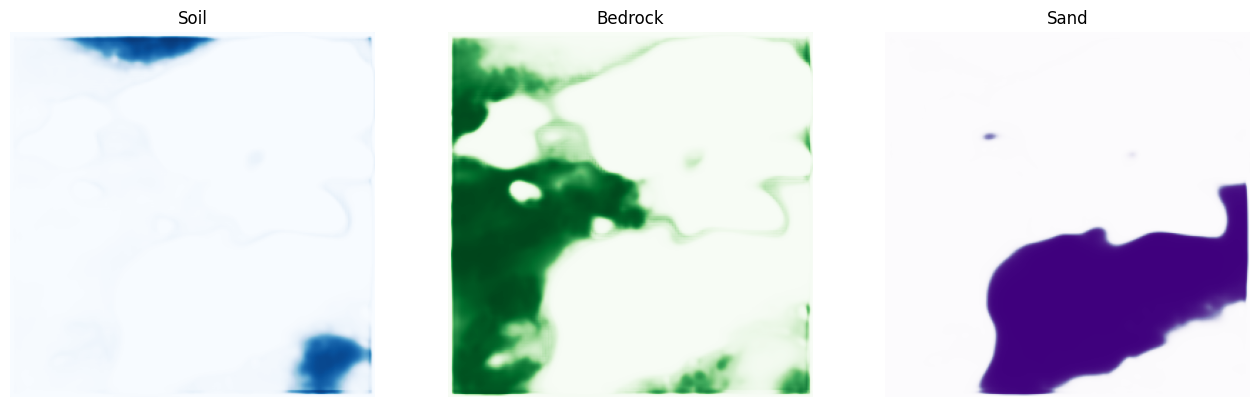

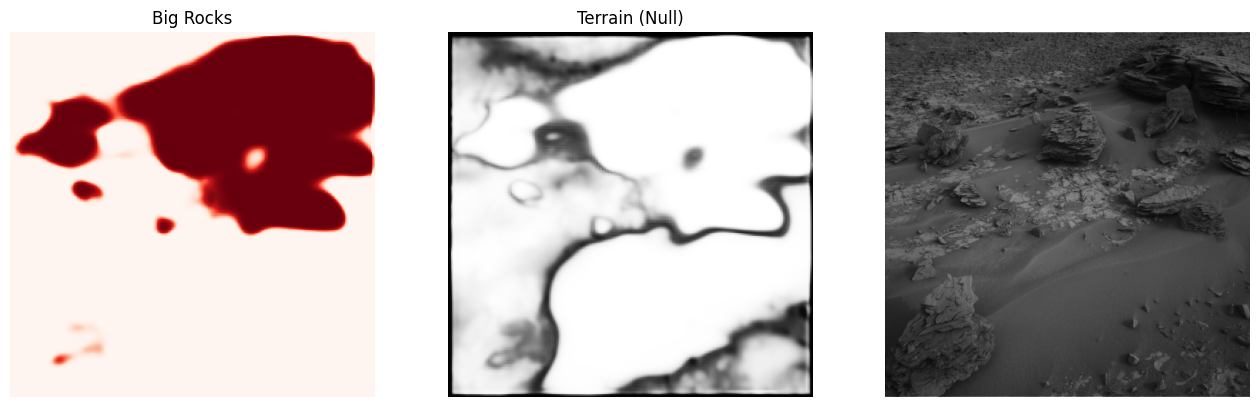

In [593]:
fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_0, cmap='Blues', vmin=0, vmax=1)
ax[0].set_title('Soil')
ax[1].axis('off')
ax[1].imshow(layer_1, cmap='Greens', vmin=0, vmax=1)
ax[1].set_title('Bedrock')
ax[2].axis('off')
ax[2].imshow(layer_2, cmap='Purples', vmin=0, vmax=1)
ax[2].set_title('Sand')

fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_3, cmap='Reds', vmin=0, vmax=1)
ax[0].set_title('Big Rocks')
ax[1].axis('off')
ax[1].imshow(layer_4,cmap='gist_yarg', vmin=0, vmax=1)
ax[1].set_title('Terrain (Null)')

ax[2].axis('off')
ax[2].imshow(image,cmap='gray', vmin=0, vmax=1)

# ax[2].imshow(la, alpha =0.6, cmap='YlOrRd')
# ax[2].set_title('All')


In [ ]:
colors=[
    (0, 0.5, 1), # soil
    (0, 1, 0.5), # bed rocks
    (1, 1, 0), # sand
    (1, 0, 0), # big rocks
    (0, 0, 0)], # null

In [105]:
layer_0 = y_pred[0][:,:,0]
layer_1= y_pred[0][:,:,1]
layer_2 = y_pred[0][:,:,2]
layer_3 = y_pred[0][:,:,3]
layer_4 = y_pred[0][:,:,4]

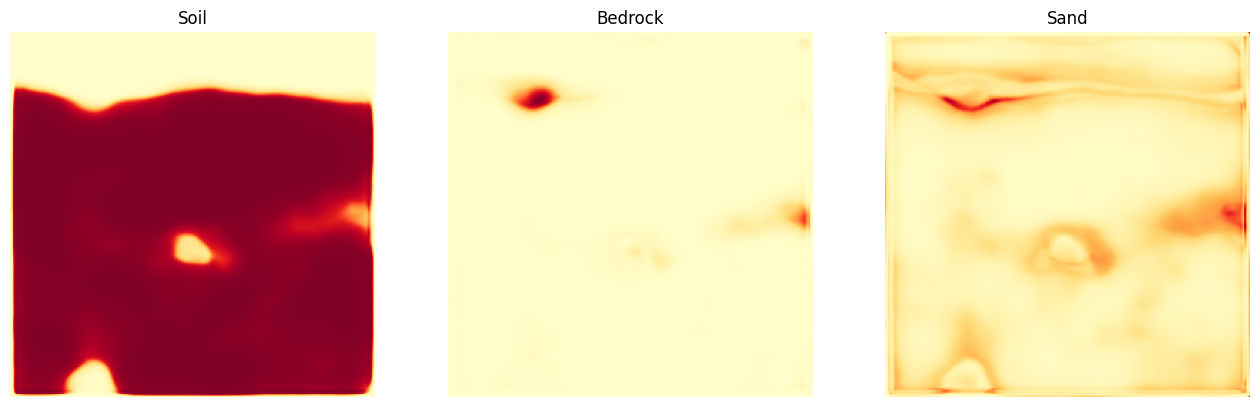

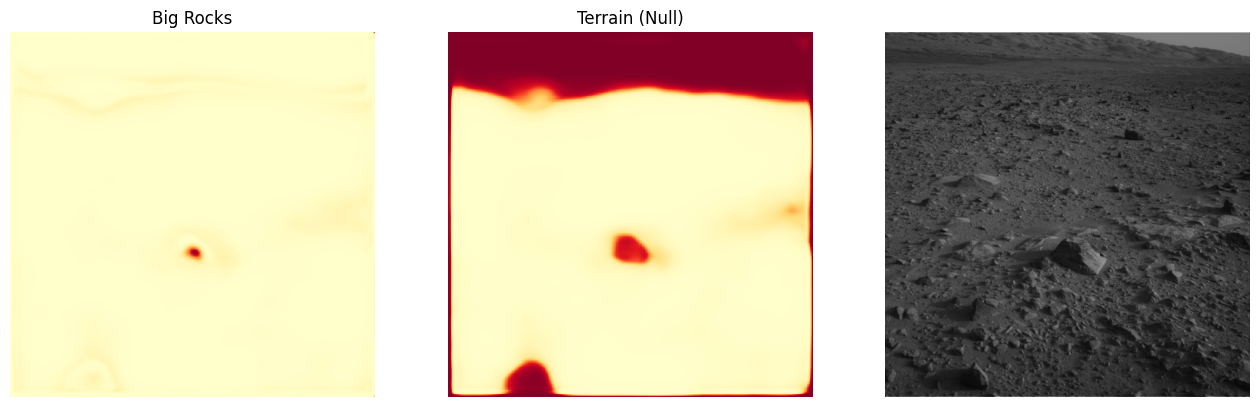

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_0, cmap='YlOrRd')
ax[0].set_title('Soil')
ax[1].axis('off')
ax[1].imshow(layer_1, cmap='YlOrRd')
ax[1].set_title('Bedrock')
ax[2].axis('off')
ax[2].imshow(layer_2, cmap='YlOrRd')
ax[2].set_title('Sand')

fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_3, cmap='YlOrRd')
ax[0].set_title('Big Rocks')
ax[1].axis('off')
ax[1].imshow(layer_4,cmap='YlOrRd')
ax[1].set_title('Terrain (Null)')

ax[2].axis('off')
ax[2].imshow(image,cmap='gray')

# ax[2].imshow(la, alpha =0.6, cmap='YlOrRd')
# ax[2].set_title('All')


In [153]:
premiere_couche = np.ma.masked_where(layer_0 == 0, layer_0)
deuxieme_couche = np.ma.masked_where(layer_1 == 0, layer_1)
troisieme_couche = np.ma.masked_where(layer_2 == 0, layer_2)
quantirieme_couche = np.ma.masked_where(layer_3 == 0, layer_3)
cinquieme_couche = np.ma.masked_where(layer_4 == 0, layer_4)

In [154]:
nouv_prem_couche = cv2.resize(premiere_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_deux_couche = cv2.resize(deuxieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_trois_couche = cv2.resize(troisieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_quatr_couche = cv2.resize(quantirieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_cinq_couche = cv2.resize(cinquieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)

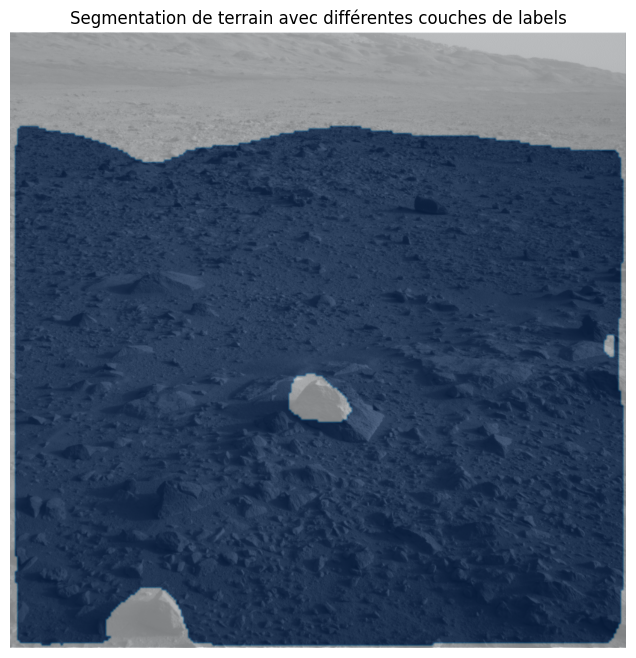

In [209]:
# Création du plot avec les couches de labels superposées à l'image originale
plt.figure(figsize=(10, 8))

# Affichage de l'image d'origine
plt.imshow(image)

# Superposition des couches de labels avec différentes couleurs et transparences
alpha = 0.5  # Niveau de transparence pour les couches de labels

plt.imshow(nouv_prem_couche, cmap='Blues', alpha=alpha)
#plt.imshow(nouv_deux_couche, cmap='Reds', alpha=alpha)
#plt.imshow(nouv_trois_couche, cmap='Greens', alpha=alpha)
#plt.imshow(nouv_quatr_couche, cmap='Purples', alpha=alpha)
#plt.imshow(nouv_cinq_couche, cmap='YlOrRd', alpha=alpha)

# Configuration des axes et du titre
plt.axis('off')  # Désactivation des axes
plt.title('Segmentation de terrain avec différentes couches de labels')

# Affichage
plt.show()

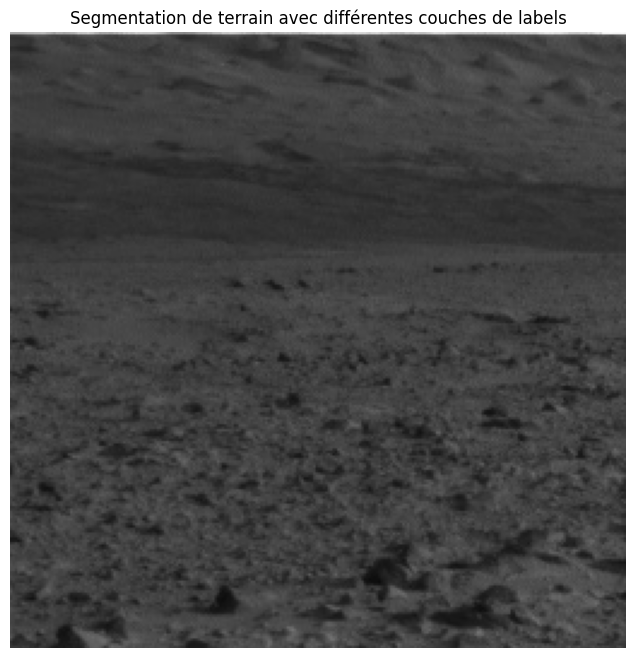

In [16]:

# Création du plot avec les couches de labels superposées à l'image originale
plt.figure(figsize=(10, 8))

# Affichage de l'image d'origine
plt.imshow(image)

# Superposition des couches de labels avec différentes couleurs et transparences
alpha = 0.5  # Niveau de transparence pour les couches de labels

#plt.imshow(np.ma.masked_where(layer_0 == 0, layer_0), cmap='Blues', alpha=alpha)
plt.imshow(np.ma.masked_where(layer_1 == 0, layer_1), cmap='YlOrRd', alpha=alpha)
#plt.imshow(np.ma.masked_where(layer_2 == 0, layer_2), cmap='Purples', alpha=alpha)
#plt.imshow(np.ma.masked_where(layer_3 == 0, layer_3), cmap='Reds', alpha=alpha)
#plt.imshow(np.ma.masked_where(layer_4 == 0, layer_4), cmap='Oranges', alpha=alpha)

# Configuration des axes et du titre
plt.axis('off')  # Désactivation des axes
plt.title('Segmentation de terrain avec différentes couches de labels')

# Affichage
plt.show()

In [242]:
show_image(image)

NameError: name 'show_image' is not defined

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

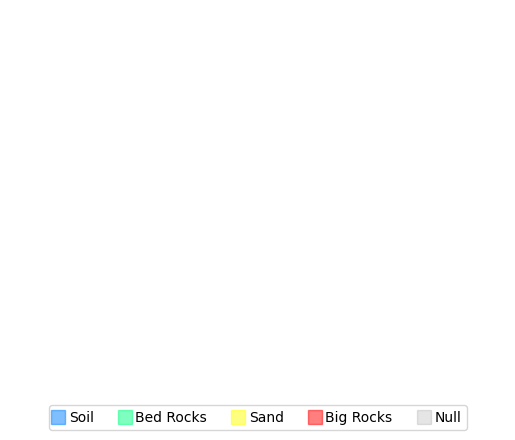

In [273]:
# Création de la légende
legend_labels = ['Soil', 'Bed Rocks', 'Sand', 'Big Rocks', 'Null']
legend_colors = [(0, 0.5, 1, 0.5), (0.0, 1.0, 0.5, 0.5), (1, 1, 0, 0.5), (1.0, 0.0, 0.0, 0.5), (0.0, 0.0, 0.0, 0.1)]
# Création des patches (carrés colorés) pour la légende
patches = [plt.plot([], [], marker='s', markersize=10, linestyle='', color=color)[0] for color in legend_colors]

# Ajout de la légende au plot
plt.legend(patches, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(legend_labels), handlelength=0.5, handletextpad=0.5)

plt.axis('off')
